<a href="https://colab.research.google.com/github/Kart8ik/final-tech-trek-project/blob/main/FINALNUMBERHANDPRED.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## importing needed libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D,Dropout


## loading and understanding our dataset

[[[0.46666667 0.4745098  0.47843137 ... 0.5176471  0.5137255  0.5019608 ]
  [0.49803922 0.4862745  0.4862745  ... 0.5254902  0.5176471  0.50980395]
  [0.54509807 0.49411765 0.49019608 ... 0.5294118  0.5254902  0.5137255 ]
  ...
  [0.5019608  0.5137255  0.5176471  ... 0.5529412  0.54509807 0.53333336]
  [0.49803922 0.5058824  0.5137255  ... 0.54509807 0.53333336 0.52156866]
  [0.49019608 0.49803922 0.5019608  ... 0.5294118  0.52156866 0.50980395]]

 [[0.59607846 0.60784316 0.61960787 ... 0.4627451  0.4509804  0.44313726]
  [0.60784316 0.61960787 0.6313726  ... 0.4745098  0.4627451  0.4509804 ]
  [0.6156863  0.627451   0.6431373  ... 0.4862745  0.4745098  0.4627451 ]
  ...
  [0.50980395 0.5176471  0.5254902  ... 0.40392157 0.39607844 0.3882353 ]
  [0.5019608  0.50980395 0.5176471  ... 0.4        0.39215687 0.38431373]
  [0.49411765 0.5058824  0.50980395 ... 0.3882353  0.38039216 0.37254903]]

 [[0.5882353  0.6039216  0.61960787 ... 0.53333336 0.5137255  0.5019608 ]
  [0.5921569  0.611764

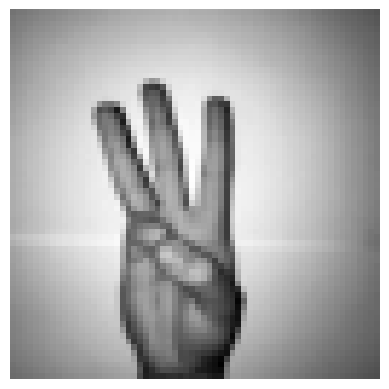

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
ysize: 20620


In [4]:
Xdataset=np.load('X.npy')
print(Xdataset)
print("size:",Xdataset.size)

import matplotlib.pyplot as plt
x1=Xdataset[800]
# Display the grayscale image
# Read the image

plt.imshow(x1,cmap='gray')
plt.axis("off")
plt.show()
Ydataset=np.load('Y.npy')
print(Ydataset[800])
print("ysize:",Ydataset.size)

## preprocessing our dataset

In [5]:
Xdataset2 = Xdataset.reshape(Xdataset.shape[0],64,64, 1) # scaling and normalization
print(Xdataset2[0][0])

[[0.46666667]
 [0.4745098 ]
 [0.47843137]
 [0.48235294]
 [0.4862745 ]
 [0.49019608]
 [0.49411765]
 [0.49411765]
 [0.5058824 ]
 [0.5137255 ]
 [0.5254902 ]
 [0.5372549 ]
 [0.54901963]
 [0.5647059 ]
 [0.58431375]
 [0.6       ]
 [0.6156863 ]
 [0.6313726 ]
 [0.6509804 ]
 [0.6666667 ]
 [0.6784314 ]
 [0.6901961 ]
 [0.69803923]
 [0.7137255 ]
 [0.7254902 ]
 [0.7294118 ]
 [0.7411765 ]
 [0.7490196 ]
 [0.7490196 ]
 [0.7529412 ]
 [0.7490196 ]
 [0.7490196 ]
 [0.7490196 ]
 [0.74509805]
 [0.7411765 ]
 [0.73333335]
 [0.7254902 ]
 [0.72156864]
 [0.7137255 ]
 [0.7058824 ]
 [0.69411767]
 [0.6862745 ]
 [0.6745098 ]
 [0.6627451 ]
 [0.6509804 ]
 [0.6392157 ]
 [0.6313726 ]
 [0.62352943]
 [0.62352943]
 [0.6156863 ]
 [0.60784316]
 [0.59607846]
 [0.5882353 ]
 [0.5764706 ]
 [0.5647059 ]
 [0.5568628 ]
 [0.54509807]
 [0.5411765 ]
 [0.5372549 ]
 [0.53333336]
 [0.52156866]
 [0.5176471 ]
 [0.5137255 ]
 [0.5019608 ]]


## splitting our testing and training datasets

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xdataset, Ydataset , test_size = 0.25, random_state = 0)

## creating and initialising the layers of our CNN model

* we use a sequential CNN model as it works well for models with
small to medium level complexity like our model.

* it allows us to use layers in a linear  manner making it easy to understand the flow of the model.

* we use convolution,pooling,flatten and dropout layers, dense layers

* convoluting layers apply a certain filter to either blur,sharpen or detect edges of an image based on the data.

* pooling layers reduce dimensions of an image without losing too much important information.

* dropout layers are used to deactivate certain neurons when the model starts overfitting to prevent it.

* flatten layer turns its input image in amtrix form into a single dimensional array making it easy to feed into the next layers.

*dense layers are the fully connected layers with all neurons from previous layers connected to perform calculations and learn complex relations in the data.

In [25]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))  # Add dropout with a dropout rate of 0.25
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))  # Add dropout with a dropout rate of 0.25
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))   # Add dropout with a dropout rate of 0.5
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 62, 62, 32)        320       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 31, 31, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 dropout_10 (Dropout)        (None, 14, 14, 64)       

In [26]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

we use various values for epochs and batch size to dial in the best accuracy possible.


## fitting the model with our training data

In [42]:
model.fit(X_train, y_train, epochs=20, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/20
25/25 [==============================] - 9s 360ms/step - loss: 0.0158 - accuracy: 0.9948 - val_loss: 0.3430 - val_accuracy: 0.9341
Epoch 2/20
25/25 [==============================] - 9s 349ms/step - loss: 0.0202 - accuracy: 0.9929 - val_loss: 0.3699 - val_accuracy: 0.9322
Epoch 3/20
25/25 [==============================] - 8s 310ms/step - loss: 0.0134 - accuracy: 0.9955 - val_loss: 0.3765 - val_accuracy: 0.9380
Epoch 4/20
25/25 [==============================] - 9s 354ms/step - loss: 0.0165 - accuracy: 0.9948 - val_loss: 0.3638 - val_accuracy: 0.9399
Epoch 5/20
25/25 [==============================] - 9s 348ms/step - loss: 0.0187 - accuracy: 0.9935 - val_loss: 0.3389 - val_accuracy: 0.9360
Epoch 6/20
25/25 [==============================] - 8s 310ms/step - loss: 0.0198 - accuracy: 0.9935 - val_loss: 0.3417 - val_accuracy: 0.9360
Epoch 7/20
25/25 [==============================] - 9s 347ms/step - loss: 0.0148 - accuracy: 0.9961 - val_loss: 0.3461 - val_accuracy: 0.9419
Epoch 

## testing the accuracy of the model

In [43]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.34044039249420166
Test accuracy: 0.934108555316925


we evaluate the performance of the model using accuracy as its a important metric.